## Heart Disease Prediction


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.duplicated().any()

True

### Using Target to visualise the death

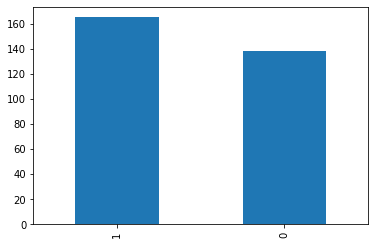

In [9]:
df['target'].value_counts().plot(kind='bar')
plt.show()

### Correlation Matrix

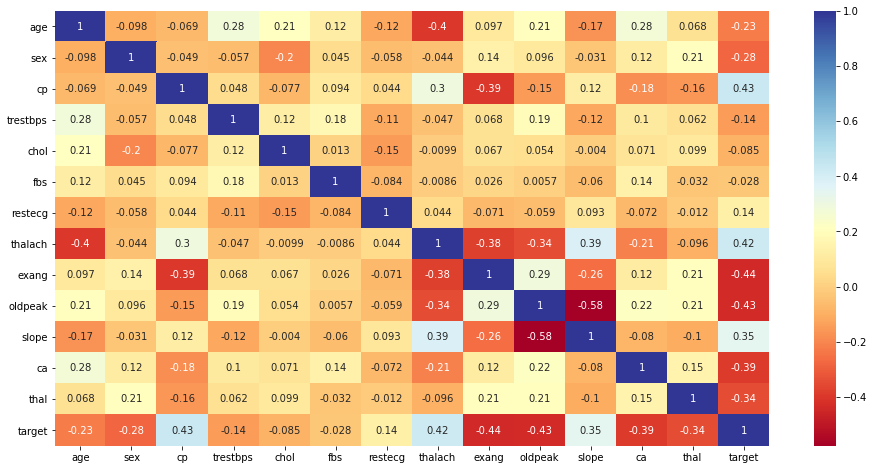

In [10]:
plt.figure(figsize=[16,8])
corr = sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")

### Visualise the correlation between each variable using a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1BE682550>,
      dtype=object)

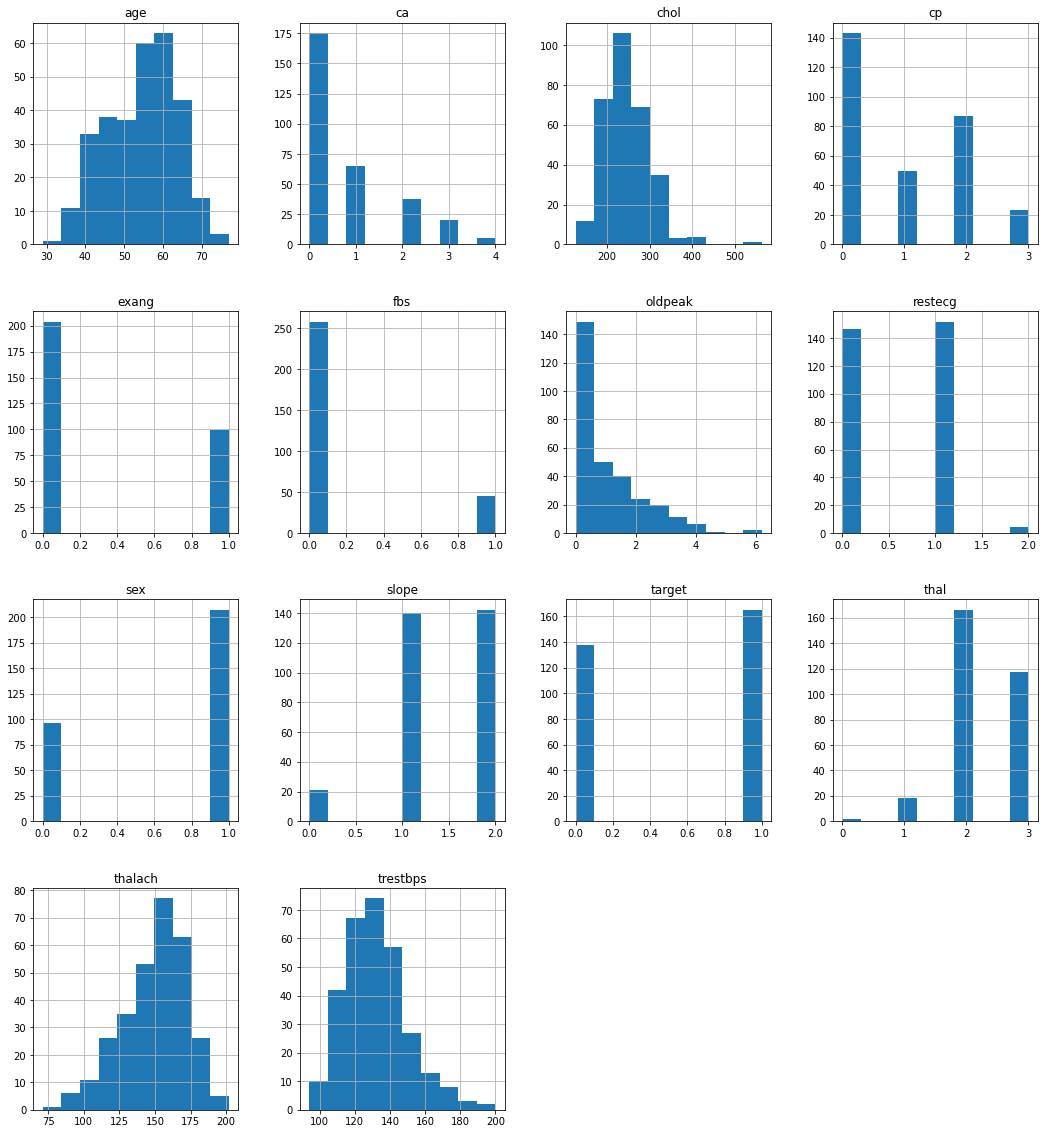

In [11]:
fig = plt.figure(figsize = (18,20))
ax = fig.gca()
df.hist(ax = ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C1BF2E0070>,
      dtype=object)

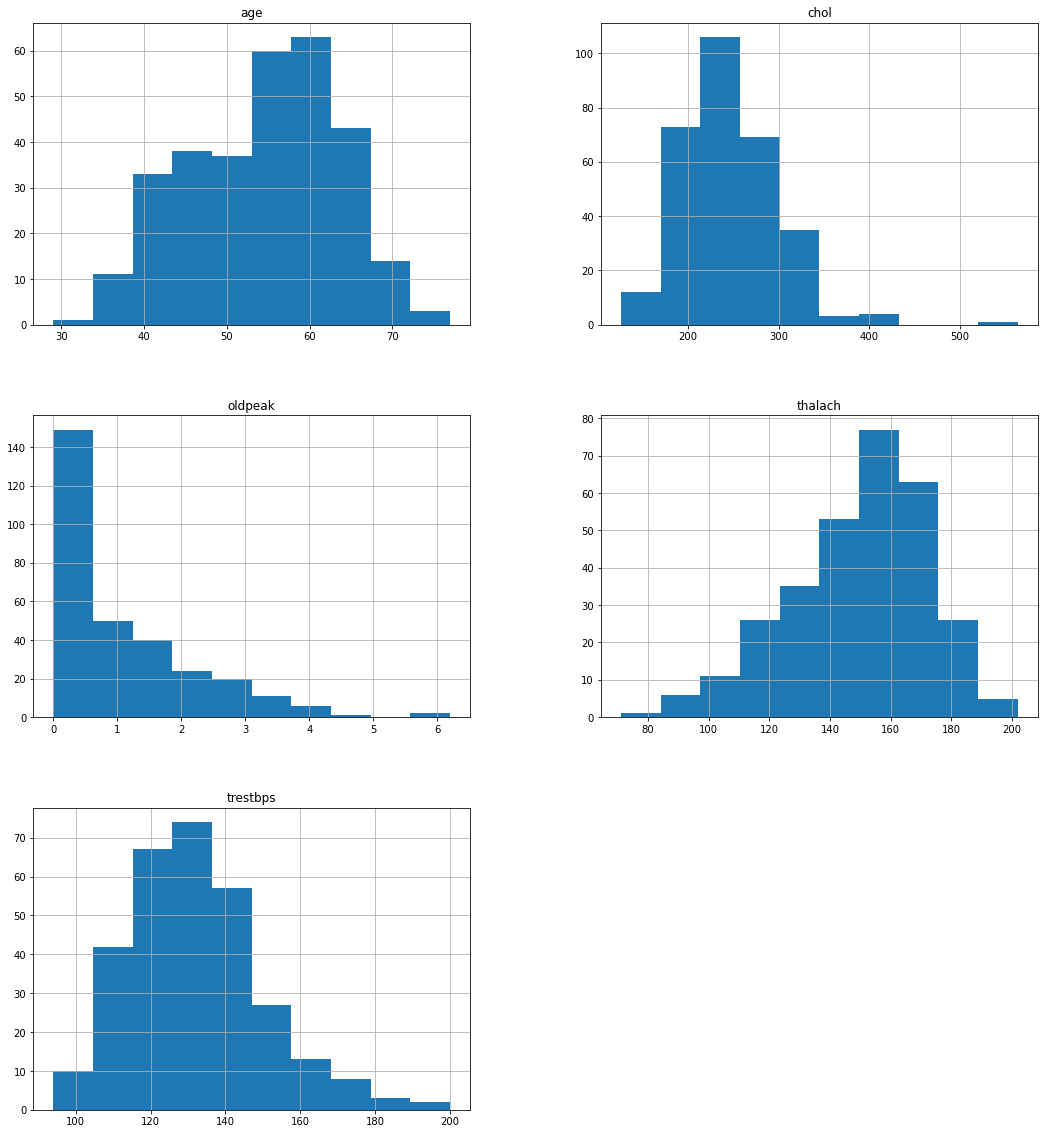

In [12]:
con = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

fig = plt.figure(figsize = (18,20))
ax = fig.gca()
con.hist(ax = ax)

In [13]:
# cate = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]

# fig = plt.figure(figsize = (18,20))
# ax = fig.gca()
# cate.hist(ax = ax)

In [37]:
#Get dummy variables
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [38]:
#Max
age = df["age"]
trestbps = df["trestbps"]
chol = df["chol"]
thalach = df["thalach"]
oldpeak = df["oldpeak"]

max_age = age.max()
max_trestbps= trestbps.max()
max_chol= chol.max()
max_thalach= thalach.max()
max_oldpeak = oldpeak.max()

print(max_age)
print(max_trestbps)
print(max_chol)
print(max_thalach)
print(max_oldpeak)

77
200
564
202
6.2


### Feature Selection

In [39]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [41]:
features = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3']]

### Splitting Data

In [42]:
X = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak','sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3']]
y = df['target']
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [50]:
df.loc[df['target'] == 1]


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,120,240,169,0.0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
161,55,132,342,166,1.2,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
162,41,120,157,182,0.0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
163,38,138,175,173,0.0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33)

In [64]:
y_test.value_counts()

1    55
0    45
Name: target, dtype: int64

## Data Preprocessing

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Support Vector Classifier

In [68]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC 
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
predict_1 = svm.predict(X_test)
print("Classification Report : \n\n" , classification_report(predict_1,y_test),"\n")

Classification Report : 

               precision    recall  f1-score   support

           0       0.71      0.80      0.75        40
           1       0.85      0.78      0.82        60

    accuracy                           0.79       100
   macro avg       0.78      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100
 



In [25]:
#pd.DataFrame({"Prediction": predict_1, "Actual": y_test}).reset_index(drop=True)

## K Neighbors Classifier¶


In [69]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train) 

predict_2 = knn.predict(X_test) 
print(classification_report(y_test, predict_2 ))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80        45
           1       0.82      0.85      0.84        55

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [73]:
pd.DataFrame({"Prediction": predict_2, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,1
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
95,1,1
96,1,1
97,0,0
98,1,0


## Random forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)

predict_3 = rf.predict(X_test) # get y predictions
print(classification_report(y_test, predict_3)) # output accuracy

              precision    recall  f1-score   support

           0       0.75      0.73      0.74        45
           1       0.79      0.80      0.79        55

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



In [72]:
pd.DataFrame({"Prediction": predict_3, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
95,1,1
96,1,1
97,1,0
98,1,0


In [30]:
# feature_names = X.columns
# target_names=["0", "1"]
# import matplotlib.pyplot as plt
# from sklearn import tree
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# clf.score(X_test, y_test)

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf,
#                    feature_names=feature_names,
#                    class_names=target_names,
#                    filled=True)


### Logistic Regression

In [75]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1) 
lr = lr.fit(X_train, y_train)

predict_4 = lr.predict(X_test) # get y predictions
print(classification_report(y_test, predict_4)) # output accuracy


              precision    recall  f1-score   support

           0       0.82      0.71      0.76        45
           1       0.79      0.87      0.83        55

    accuracy                           0.80       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.80      0.80       100



### Confusion matrix

In [76]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : \n\n" , confusion_matrix(predict_2,y_test))
accuracy_score(y_test, predict_2)

Confusion Matrix : 

 [[35  8]
 [10 47]]


0.82

In [77]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))
print(model)

RandomForestClassifier()


The dataset for this analysis is from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) 
The model will predict if a person suffers from heart disease or not 